In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample = pd.read_csv("data/sample.csv")


In [3]:
# data.to_csv('train.csv', index=False)
# test.to_csv('test.csv', index=False)
# sample.to_csv('sample.csv', index=False)


In [4]:
m, n = data.shape

test = np.array(test)
data_test = test[:m].T
X_test = data_test
X_test = X_test / 255.0


y = data.pop("label")
X = data
X = X / 255.0


In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X.values, y.values, test_size=0.2, random_state=21, stratify=y
)
X_train = X_train.T
X_val = X_val.T


In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(inputs, T):

    exp_values = np.exp((inputs - np.max(inputs, axis=0, keepdims=True)) / T)
    output = exp_values / np.sum(exp_values, axis=0, keepdims=True)
    #     print(A.shape)
    return output


def forward_prop(W1, b1, W2, b2, X, t):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2, t)
    return Z1, A1, Z2, A2


def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def deriv_ReLU(Z):
    return Z > 0


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)


def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X, Y, iterations, alpha, T):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X, T)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2, Z2


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    T = 1
    _, _, Z2, A2 = forward_prop(W1, b1, W2, b2, X, T)
    predictions = get_predictions(A2)
    return predictions, Z2


def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction, embs = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()


In [30]:
lr = 0.8
T = 0.01
iters = 1000
W1, b1, W2, b2, Z2 = gradient_descent(X_train, y_train, iters, lr, T)


Iteration:  0
[2 2 2 ... 8 8 9] [0 0 5 ... 2 7 3]
Accuracy:  0.09505952380952382
Iteration:  100
[0 0 3 ... 8 3 0] [0 0 5 ... 2 7 3]
Accuracy:  0.3724702380952381
Iteration:  200
[0 0 3 ... 8 7 7] [0 0 5 ... 2 7 3]
Accuracy:  0.518125
Iteration:  300
[7 7 5 ... 6 7 7] [0 0 5 ... 2 7 3]
Accuracy:  0.4829761904761905
Iteration:  400
[7 0 5 ... 8 7 5] [0 0 5 ... 2 7 3]
Accuracy:  0.594047619047619
Iteration:  500
[5 0 5 ... 8 7 5] [0 0 5 ... 2 7 3]
Accuracy:  0.6843154761904762
Iteration:  600
[0 0 3 ... 6 7 3] [0 0 5 ... 2 7 3]
Accuracy:  0.6217559523809524
Iteration:  700
[5 0 9 ... 6 7 9] [0 0 5 ... 2 7 3]
Accuracy:  0.677202380952381
Iteration:  800
[5 0 5 ... 6 7 5] [0 0 5 ... 2 7 3]
Accuracy:  0.7072619047619048
Iteration:  900
[0 0 3 ... 6 7 3] [0 0 5 ... 2 7 3]
Accuracy:  0.6897321428571429


In [31]:
dev_predictions, embs = make_predictions(X_val, W1, b1, W2, b2)
acc = round(get_accuracy(dev_predictions, y_val) * 100, 2)
print(acc)


[5 2 4 ... 5 9 2] [3 2 4 ... 3 9 3]
57.94


In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1, verbose=1, metric="cosine")

embs = tsne.fit_transform(embs.T)
# Add to dataframe for convenience
dfx = pd.DataFrame()
dfx["x"] = embs[:, 0]
dfx["y"] = embs[:, 1]
dfx["label"] = y_val


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8400 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


[t-SNE] Computed neighbors for 8400 samples in 1.834s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8400
[t-SNE] Computed conditional probabilities for sample 2000 / 8400
[t-SNE] Computed conditional probabilities for sample 3000 / 8400
[t-SNE] Computed conditional probabilities for sample 4000 / 8400
[t-SNE] Computed conditional probabilities for sample 5000 / 8400
[t-SNE] Computed conditional probabilities for sample 6000 / 8400
[t-SNE] Computed conditional probabilities for sample 7000 / 8400
[t-SNE] Computed conditional probabilities for sample 8000 / 8400
[t-SNE] Computed conditional probabilities for sample 8400 / 8400
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.301582
[t-SNE] KL divergence after 1000 iterations: 0.805038


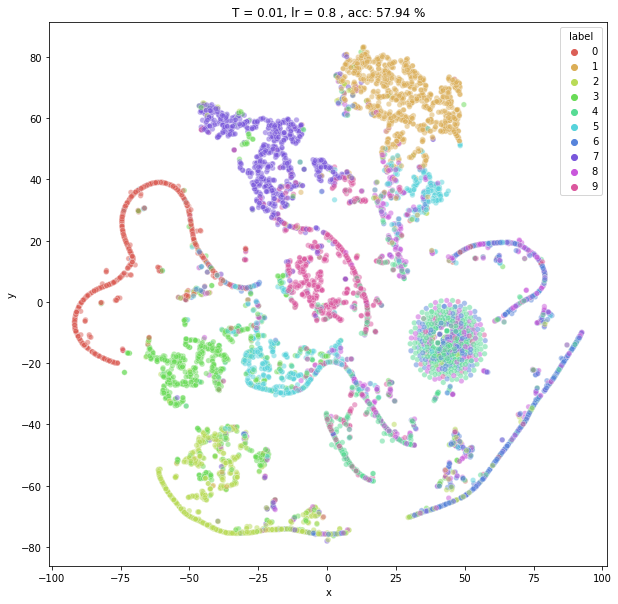

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

plt.figure(figsize=[10, 10])
sns.scatterplot(
    data=dfx,
    x="x",
    y="y",
    alpha=0.5,
    hue="label",
    palette=sns.color_palette("hls", 10),
    s=30,
).set(title=f"T = {T}, lr = {lr} , acc: {acc} %")
plt.savefig(f"plots/{timestamp}.png")


In [34]:
test = np.array(test)
test = test.T
test = test / 255.0


In [35]:
# test_predictions = make_predictions(test, W1, b1, W2, b2)

# df = pd.DataFrame(test_predictions)
# sample["Label"] = test_predictions
# sample.to_csv(f"{timestamp}.csv", index=False)


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_val, dev_predictions))


              precision    recall  f1-score   support

           0       0.96      0.74      0.84       826
           1       0.97      0.77      0.85       937
           2       0.41      0.90      0.57       835
           3       0.00      0.00      0.00       870
           4       0.39      0.88      0.54       814
           5       0.60      0.67      0.63       759
           6       0.71      0.11      0.18       828
           7       0.95      0.75      0.84       880
           8       0.27      0.30      0.29       813
           9       0.74      0.68      0.71       838

    accuracy                           0.58      8400
   macro avg       0.60      0.58      0.54      8400
weighted avg       0.60      0.58      0.55      8400



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.